In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from metrics.RankEval import RankEval
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('whitegrid')

In [6]:
rank1 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's']
rank1_dict = {c: i+1 for i, c in enumerate(rank1)}


In [7]:
evaluator = RankEval()

In [29]:
def swap_n(rank, n):
    '''
    Swaps n adjacent rankings
    '''
    modified_ranking = rank.copy()

    for i in range(0, n):
        replace_cat = rank1[2 * i]
        replace_cat2 = rank1[2 * i + 1]

        modified_ranking[replace_cat] = rank[replace_cat2]
        modified_ranking[replace_cat2] = rank[replace_cat]
    return modified_ranking

In [8]:
def swap_by_n(rank, ref, n_down):
    '''
    swaps `ref` ranking with n_down ranking
    '''
    modified_ranking = rank.copy()


    replace_cat = rank1[ref - 1]
    replace_cat2 = rank1[ref + n_down - 1]

    modified_ranking[replace_cat] = rank[replace_cat2]
    modified_ranking[replace_cat2] = rank[replace_cat]

    return modified_ranking

In [141]:
reverse_dict = {v: k for k, v in rank1_dict.items()}

In [182]:
def determine_swaps(num_categories, swap_by_n):
    swaps = []
    used_positions = set()

    for i in range(1, num_categories + 1):
        swap_with = i + swap_by_n
        
        if swap_with <= num_categories and i not in used_positions and swap_with not in used_positions:
            swaps.append((i, swap_with))
            used_positions.add(i)
            used_positions.add(swap_with)
    
    return swaps

def swap(rank, cat1, cat2):
    modified_ranking = rank.copy()

    modified_ranking[cat1] = rank[cat2]
    modified_ranking[cat2] = rank[cat1]

    return modified_ranking

# iterate over swap distance
swap_matrix = np.full((18, 10), np.nan)
for i in range(1, 19):
    swaps = determine_swaps(19, i)
    curr_working = rank1_dict
    for j, to_swap in enumerate(swaps):
        ablated_rank = swap(curr_working, reverse_dict[to_swap[0]], reverse_dict[to_swap[1]])
        swap_matrix[i-1][j] = evaluator._kendalls_tau(rank1_dict, ablated_rank)
        curr_working = ablated_rank

# Example usage:
# num_categories = 19
# swap_by_n = 1
# swaps = determine_swaps(num_categories, swap_by_n)
# print(f"Total swaps: {len(swaps)}")
# print("Swaps:", swaps)


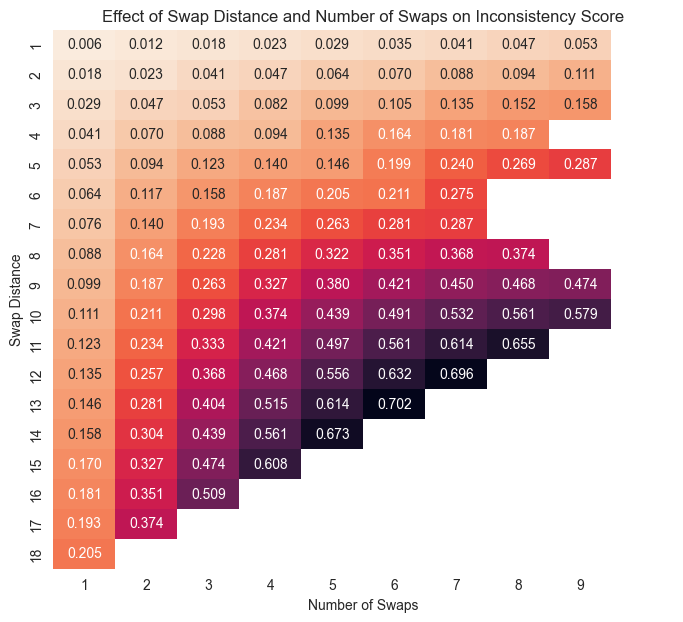

In [200]:
plt.figure(figsize=(8, 7))

# Adjusting the axes and moving the colorbar
ax = sns.heatmap(swap_matrix[:, :10], annot=True, cmap='rocket_r', fmt=".3f", cbar_kws={'label': "Kendall's Tau"}, cbar=False)
# cbar = plt.colorbar(ax.collections[0], ax=ax, location='left', pad=0.05)
ax.grid(False)

# Adjust the axes labels to index from 1 to 9 and center them under the boxes
xticks = np.arange(0.5, 9, 1)
yticks = np.arange(0.5, max_swap_distance, 1)

ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(1, 10))

ax.set_yticks(yticks)
ax.set_yticklabels(np.arange(1, max_swap_distance + 1))

plt.xlabel("Number of Swaps")
plt.ylabel("Swap Distance")
plt.title("Effect of Swap Distance and Number of Swaps on Inconsistency Score")
plt.show()

In [154]:
swap_matrix = np.full((18, 10), np.nan)

In [157]:
swap_matrix[17]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [147]:
swap(rank1_dict, 'd', 'c')

{'a': 1,
 'b': 2,
 'c': 4,
 'd': 3,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19}

In [111]:
evaluator._kendalls_tau(rank1_dict, swap_by_n(rank1_dict, 1, 12))

0.13450292397660824

In [114]:
taus_swap_by_n = []
for i in range(19):
    taus_swap_by_n.append(evaluator._kendalls_tau(rank1_dict, swap_by_n(rank1_dict, 1, i)))

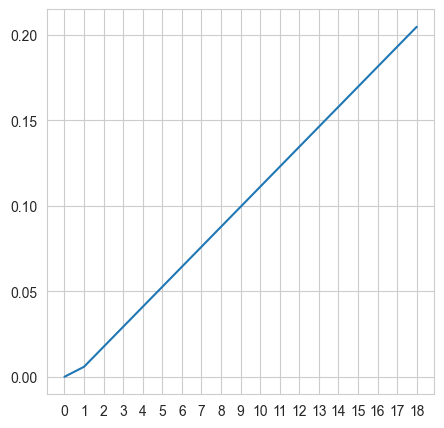

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True, sharex=False, figsize=(5,5))
axes.plot(taus_swap_by_n)
# axes.plot(taus_swap_n, c='red')
# axes.plot(taus_sift, c='purple')
axes.set_xticks(range(19))
# axes.set_xlabel('Number of ')

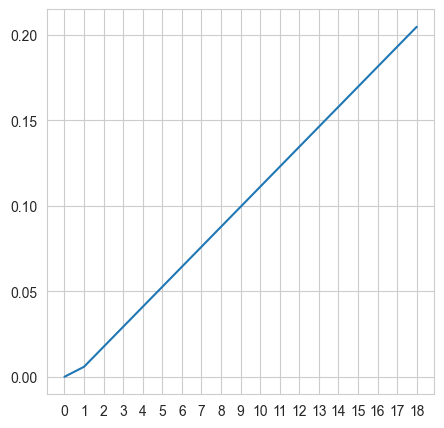

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True, sharex=False, figsize=(5,5))
axes.plot(taus_swap_by_n)
# axes.plot(taus_swap_n, c='red')
# axes.plot(taus_sift, c='purple')
axes.set_xticks(range(19))
# axes.set_xlabel('Number of ')

In [59]:
def sift(rank, n):
    '''
    Sifts n categories from top to bottom. Everything else gets pushed up accordingly
    '''
    modified_ranking = rank.copy()

    for i in range(n):
        modified_ranking = {key: (val - 1) if (val - 1) > 0 else 19 for key, val in modified_ranking.items()}

    return modified_ranking

    

In [60]:
sift(rank1_dict, 18)

{'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 1}

In [61]:
taus_sift = np.zeros(20)
for i in range(20):
    taus_sift[i] = evaluator._kendalls_tau(rank1_dict, sift(rank1_dict, i))

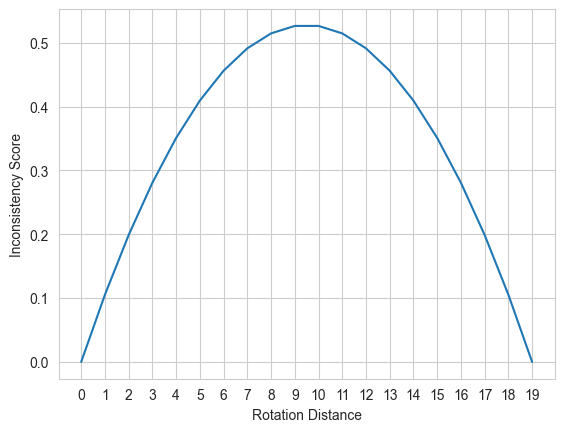

In [60]:
plt.plot(taus)
plt.ylabel('Inconsistency Score')
plt.xlabel('Rotation Distance')
plt.xticks([i for i in range(20)])
plt.show()